In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import tensorflow as tf

In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(227845, 30)

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
!export CUDA_VISIBLE_DEVICES=1
!nvidia-smi
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

Num GPUs Available:  1
Fri Dec  1 10:01:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |   1581MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                 

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1793: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
model2= Sequential()
model2.add(Dense(16, input_shape=(30,),activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(4,activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(30))
model2.compile(optimizer ='adam',loss=  'mean_squared_error')

In [ ]:
X= scaler.fit_transform(X)

In [ ]:
model2.fit(X, X, epochs=100, batch_size=2048, shuffle=True)


Epoch 1/100
140/140 [==============================] - 1s 4ms/step - loss: 0.5153
Epoch 2/100
140/140 [==============================] - 1s 4ms/step - loss: 0.5144
Epoch 3/100
140/140 [==============================] - 1s 4ms/step - loss: 0.5141
Epoch 4/100
140/140 [==============================] - 1s 4ms/step - loss: 0.5134
Epoch 5/100
140/140 [==============================] - 1s 4ms/step - loss: 0.5128
Epoch 6/100
140/140 [==============================] - 1s 4ms/step - loss: 0.5125
Epoch 7/100
140/140 [==============================] - 1s 4ms/step - loss: 0.5119
Epoch 8/100
140/140 [==============================] - 1s 4ms/step - loss: 0.5115
Epoch 9/100
140/140 [==============================] - 1s 4ms/step - loss: 0.5111
Epoch 10/100
140/140 [==============================] - 1s 4ms/step - loss: 0.5106
Epoch 11/100
140/140 [==============================] - 1s 6ms/step - loss: 0.5105
Epoch 12/100
140/140 [==============================] - 1s 6ms/step - loss: 0.5103
Epoch 13/100


KeyboardInterrupt: ignored

In [ ]:
predictions2 = model2.predict(X)
mse = np.mean(np.power(X - predictions2, 2), axis=1)
mse_df = pd.DataFrame({'error': mse/np.max(mse),'test_class': y})
mse_df.head()

8901/8901 [==============================] - 17s 2ms/step


,error,test_class
0,0.000915,0
1,0.000624,0
2,0.006211,0
3,0.001591,0
4,0.001921,0


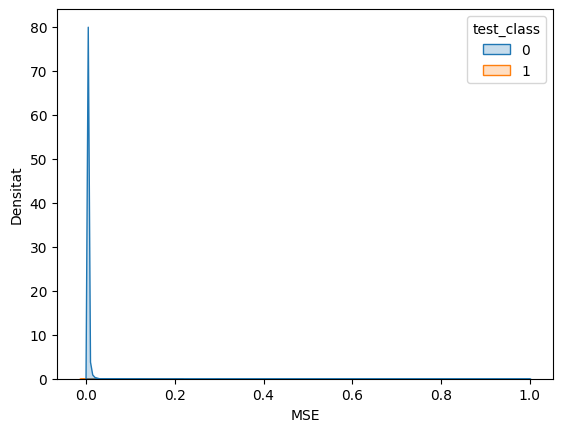

In [ ]:
sns.kdeplot(data=mse_df, x='error', hue='test_class', fill=True)
plt.xlabel('MSE')
plt.ylabel('Densitat')
plt.show()

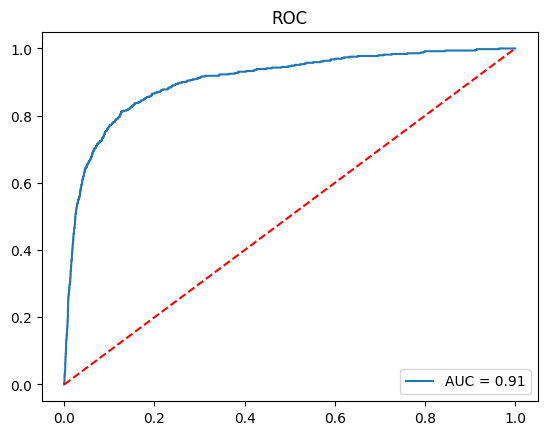

In [ ]:
fpr, tpr, thresholds = roc_curve(mse_df.test_class, mse_df.error)
roc_auc = auc(fpr, tpr)
plt.title('ROC')
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.show();

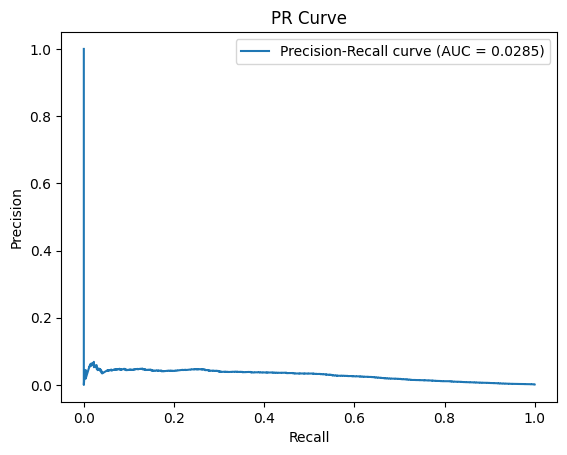

In [ ]:
precision, recall, thresholds = precision_recall_curve(mse_df.test_class, mse_df.error)
auc_pr = auc(recall, precision)

plt.plot(recall, precision,label=f'Precision-Recall curve (AUC = {auc_pr:.4f})')
plt.title('PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.show()